## Data Ingestion

In [4]:
# importing libraries

import pandas as pd

In [5]:
# reading the data set

data=pd.read_csv("/Users/nehadhananju/Desktop/Netflix_project/notebooks/data/netflix.csv")


## Data Wrangling

In [6]:
# Counting the number of rows and columns in data set

rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 7787
Number of columns: 12


In [7]:
# Reading the first few rows to get an overview of the data

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Get a summary of columns, non-null counts, and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Counting the total number of duplicate rows 

duplicates = data.duplicated()
print("Total duplicate rows:", duplicates.sum())


Total duplicate rows: 0


In [10]:
# Check duplicate values in the 'title' column
title_duplicates = data.duplicated(subset='title')

# Count them
print("Duplicate titles:", title_duplicates.sum())

# View duplicate titles
data[title_duplicates]


Duplicate titles: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [11]:
# Check the total number of missing values in each column

data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
# List all column names

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Summary statistics for categorcal columns

categorical_col=data.columns[data.dtypes=='object']
data[categorical_col].describe()


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [14]:
# Summary statistics for numerical columns

numerical_col=data.columns[data.dtypes!='object']
data[numerical_col].describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [15]:
# Check the number of unique values in each column

data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

#### What did you know about your dataset?

The Netflix dataset used in this project contains information about TV shows and movies available on the 

platform as of 2019, sourced from Flixable, a third-party Netflix search engine. Each row represents a unique 

title and includes metadata such as type, title, director, cast, country, date added, release year, rating, 

duration, listed genres, and description. Initially, the dataset was examined for its structure using pandas, 

revealing the number of rows and columns. During data cleaning, several columns were found to contain missing 

values—specifically, 'director', 'cast', 'country', 'date_added', and 'rating'. These were handled 

appropriately: missing directors were replaced with 'Unknown', missing cast values with 'Not Provided', and 

missing country and date_added fields with 'Unknown'. The missing values in the 'rating' column were filled 

using the most frequent rating in the dataset. The 'description' column was complete and required no changes. 

Duplicate rows were checked using the .duplicated() method, and any duplicates, if present, were removed to 

ensure data quality. This preparation has made the dataset clean and ready for further analysis. 

#### Variable Desciption



#### What all manipulations have you done and insights you found?

## EDA 

In [16]:
# Importing libraries 

import matplotlib.pyplot as plt
import seaborn as sns

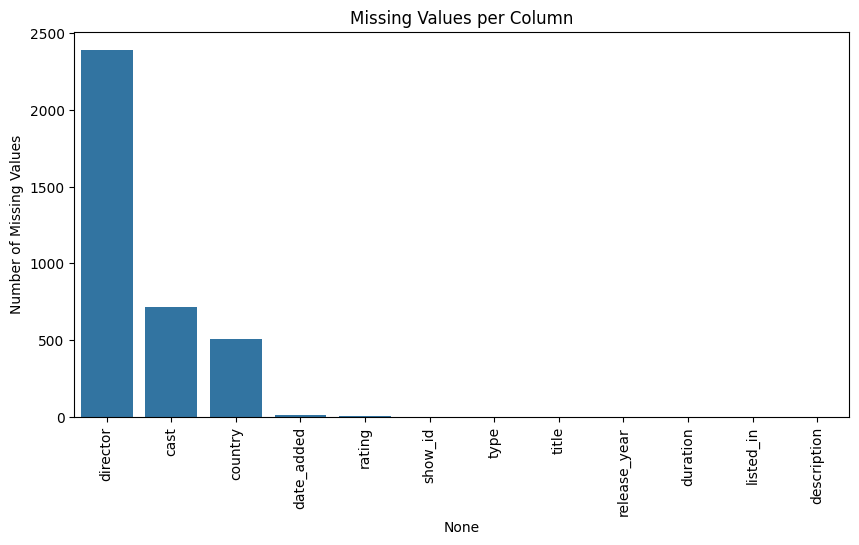

In [17]:
# Count missing values
missing_counts = data.isnull().sum().sort_values(ascending=False)
missing_perc = (missing_counts / len(data)) * 100

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

#### Why this chart??
This chart which columns need attention before modeling.



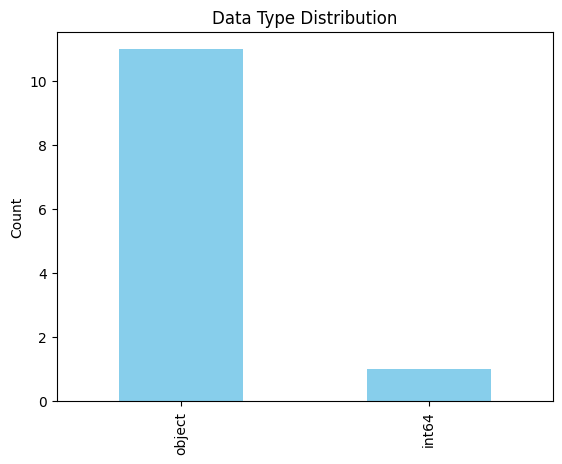

In [18]:
data.dtypes.value_counts().plot(kind='bar', color='skyblue')
plt.title("Data Type Distribution")
plt.ylabel("Count")
plt.show()

#### Why this chart ?
Quick look at categorical, numeric, datetime columns.

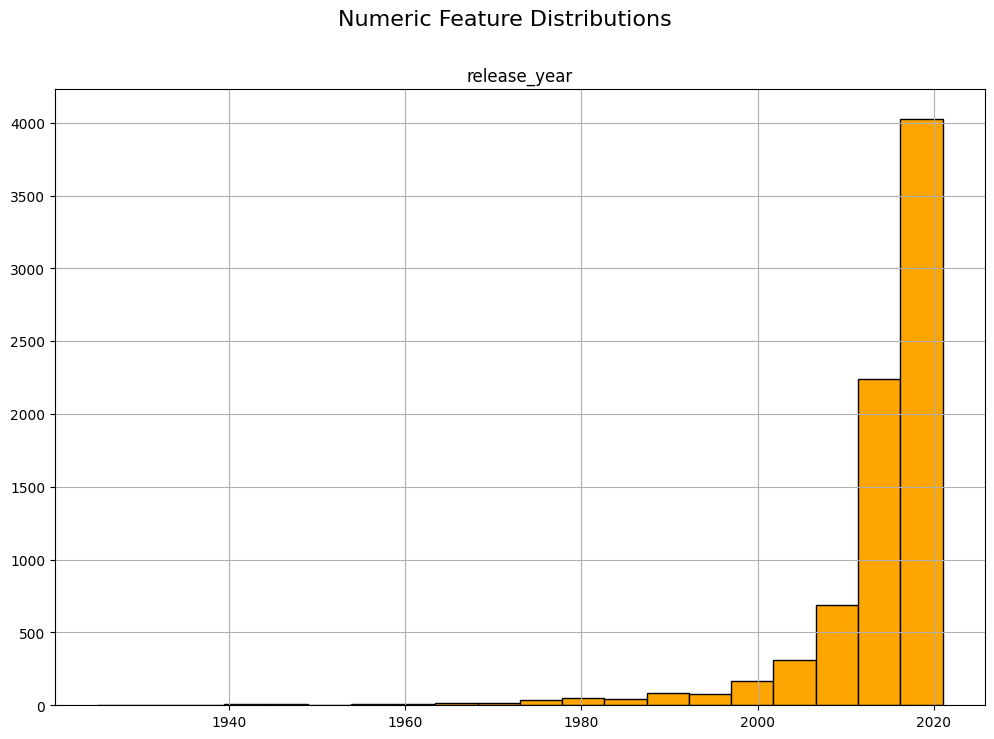

In [19]:
data[numerical_col].hist(bins=20, figsize=(12,8), color='orange', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.show()

#### Why this chart?
Detects skewness, outliers, and ranges.

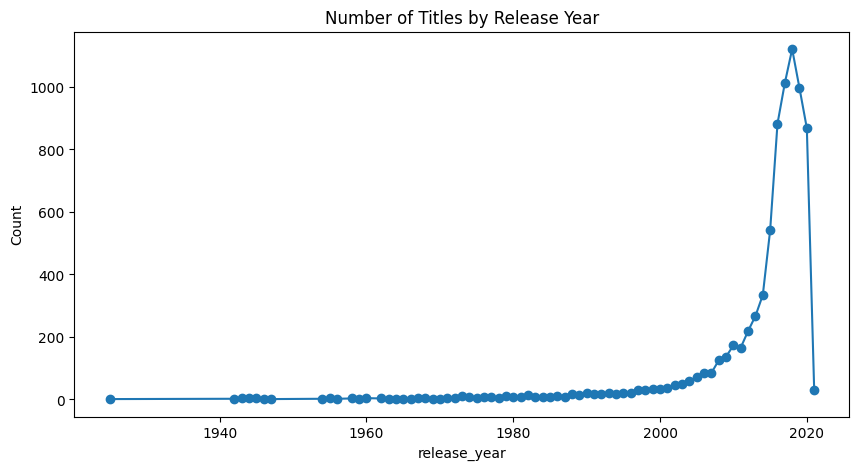

In [20]:
if 'release_year' in data.columns:
    plt.figure(figsize=(10,5))
    data['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
    plt.title('Number of Titles by Release Year')
    plt.ylabel('Count')
    plt.show()

#### Why this chart?
Shows temporal patterns in the dataset.

### Distribution of Content Type (Movies vs TV Shows)

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_31955/2115595500.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data ,palette='Set2')


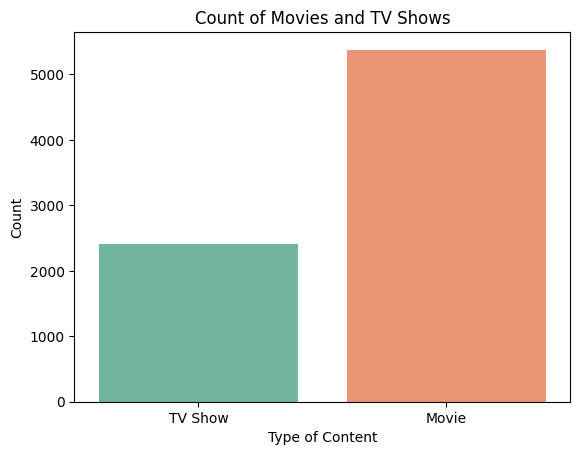

In [21]:
sns.countplot(x='type', data=data ,palette='Set2')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()


#### Why this chart?
I used a count plot (bar chart) because it effectively shows the frequency of categorical variables – in this case, how many entries are Movies and how many are TV Shows.

#### Insights:
Netflix has more Movies than TV Shows overall, but in recent years, the gap has narrowed.

#### Positive Business Impact:
This insight confirms Netflix’s diversified strategy.Increasing focus on TV shows can improve viewer engagement due to longer watch time, leading to higher customer retention.

#### Any Negative Growth?
If Netflix over-focuses on TV shows and reduces movies drastically, it may lose users who prefer shorter, standalone content. A balance is essential.

### Top 10 Countries by Number of Titles

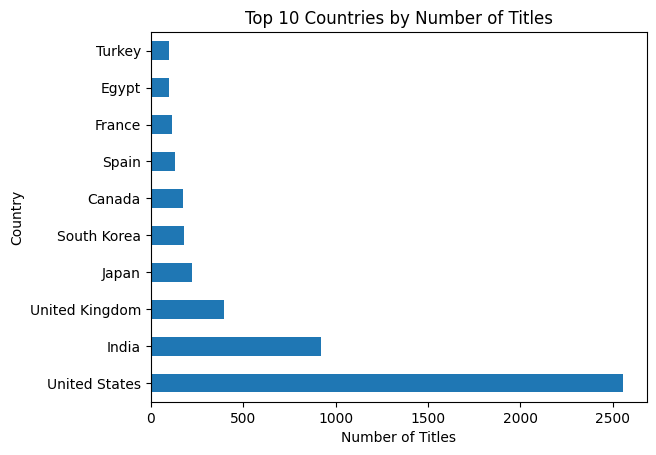

In [22]:
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


#### Why this chart?
A horizontal bar chart was chosen for readability, especially since country names are text labels. It’s ideal for comparing categorical values.

#### Insights:
The United States dominates content production, followed by India, UK, and Canada.

#### Positive Business Impact:
Knowing where most content comes from can guide future content investment and regional strategy. For instance, the rise in Indian content suggests Netflix is targeting the growing Indian market.

#### Any Negative Growth?
Over-dependence on U.S.-based content might restrict cultural diversity. Not investing enough in global content may limit market growth in other regions.

/var/folders/q3/55frhr79051_x076dkklzhgh0000gn/T/ipykernel_31955/3746756259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


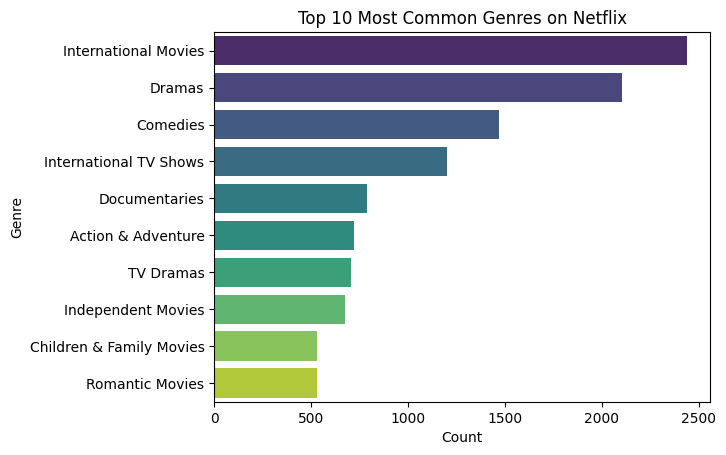

In [23]:
from collections import Counter

# Break listed_in column (which contains multiple genres per title)
genres = data['listed_in'].dropna().apply(lambda x: x.split(', '))
all_genres = Counter([genre for sublist in genres for genre in sublist])

# Convert to DataFrame
genre_df = pd.DataFrame(all_genres.most_common(10), columns=['Genre', 'Count'])

# Plot
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()




#### Why this chart?
A bar chart was used to show frequency of genres. It’s ideal for understanding content variety and user preference areas.

#### Insights:
Genres like Dramas, Comedies, Documentaries, and International content dominate.

#### Positive Business Impact:
Netflix can invest more in high-performing genres or underrepresented ones to diversify the library.

#### Any Negative Growth?
Ignoring low-performing genres may alienate niche audiences who subscribe for that content (e.g., anime, horror, etc.).

### Top 10 Content Ratings

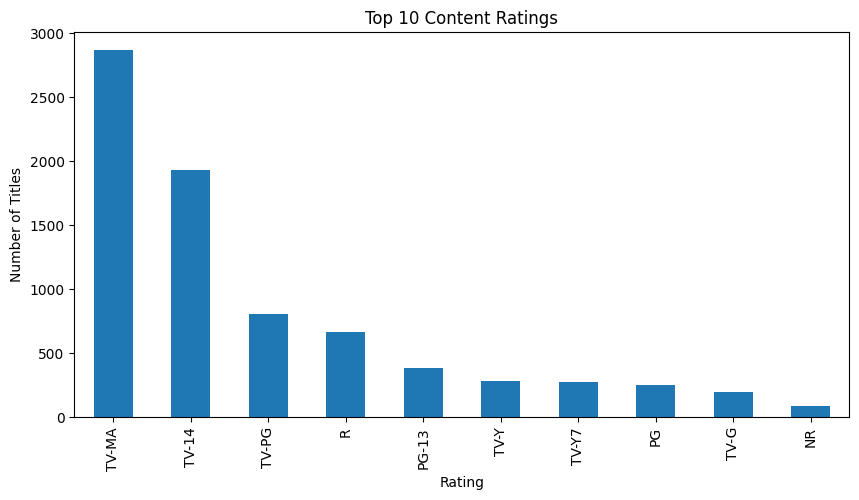

In [24]:
plt.figure(figsize=(10, 5))
data['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()


#### Why this chart?
Ratings are categorical, and a bar chart clearly shows which rating types (e.g., TV-MA, PG, R) are most common.

#### Insights:
Most content is TV-MA (Mature Audience), followed by TV-14 and PG. This means a large portion of content is geared toward adults.

#### Positive Business Impact:
Netflix is catering to a mature audience, which aligns with many of its original series and dramas. It’s also a profitable demographic.

#### Any Negative Growth?
Less focus on kids and family-friendly content could mean losing subscribers with families. Adding more PG or G-rated content could address this gap.


### Distribution Of Release Year

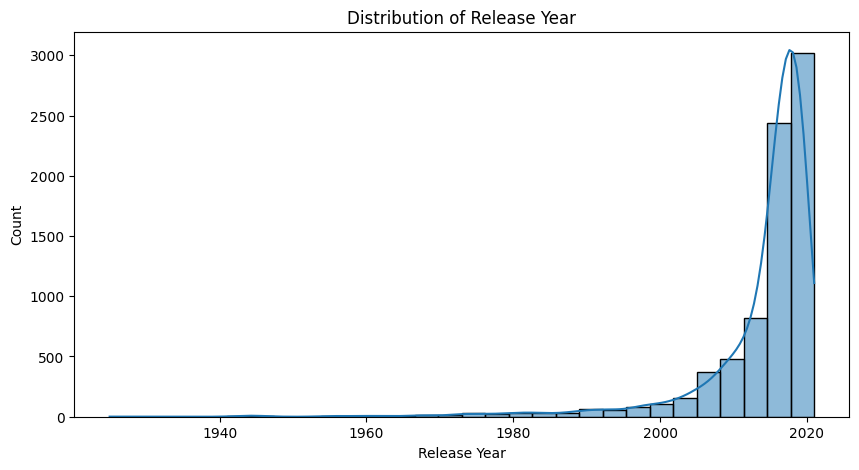

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


#### Why this chart?
This histogram with KDE (Kernel Density Estimate) shows the distribution of release years of Netflix titles in your dataset.

It helps us understand how the content is spread over time — whether most shows/movies are recent or from older years.

#### Insights from the chart
You can identify periods with more releases — peaks in certain years show when Netflix (or the industry) released more content.

Detect trends over time, such as increasing content volume in recent years, or dips possibly due to external factors (e.g., industry slowdowns).

Spot if there is an imbalance (e.g., very few titles before a certain year), which affects analysis or recommendation strategies.

#### Positive business impact
Knowing the release year distribution helps Netflix:

Content curation and recommendation: Different user groups may prefer newer vs. classic titles.

## Data Preprocessing & Feature Engineering

### Handling Missing Values

In [27]:
# Handling missing values
# Fill categorical columns with placeholders
data['director'] = data['director'].fillna('Unknown')
data['cast'] = data['cast'].fillna('Not Available')
data['country'] = data['country'].fillna('Unknown')
data['date_added'] = data['date_added'].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])


In [28]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Handling Outlier


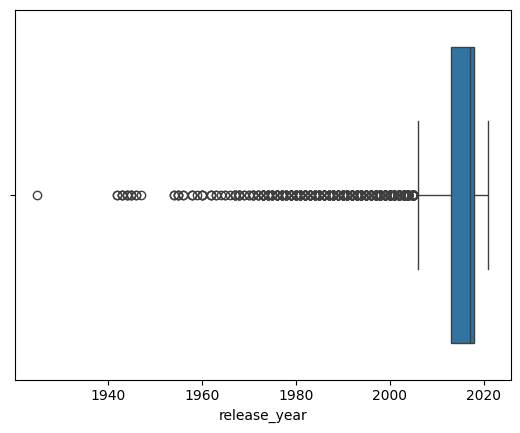

(1925, 2021)

In [29]:

sns.boxplot(x=data['release_year'])
plt.show()

# Check extreme years
data['release_year'].min(), data['release_year'].max()



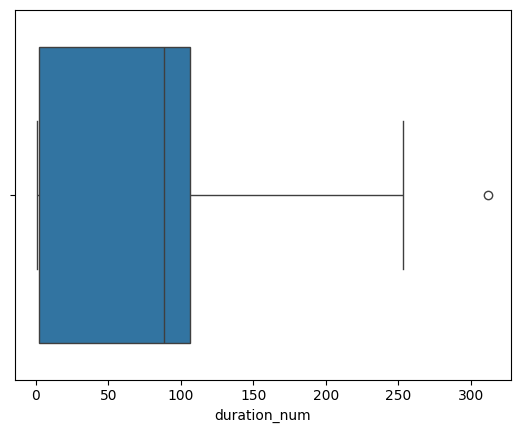

In [30]:
# Create a numeric duration column for movies
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)

sns.boxplot(x=data['duration_num'])
plt.show()


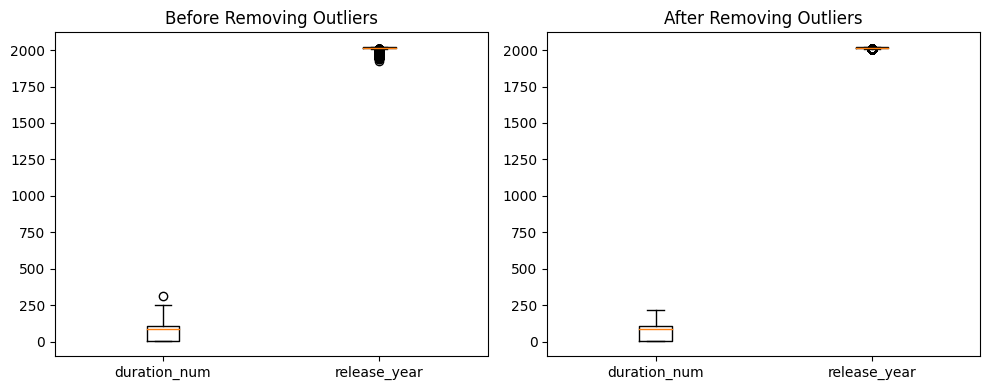

In [31]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Plot before removing outliers
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot([data['duration_num'], data['release_year']], labels=['duration_num', 'release_year'])
plt.title("Before Removing Outliers")

# Remove outliers for both columns
data_clean = remove_outliers_iqr(data, 'duration_num')
data_clean = remove_outliers_iqr(data_clean, 'release_year')

# Plot after removing outliers
plt.subplot(1,2,2)
plt.boxplot([data_clean['duration_num'], data_clean['release_year']], labels=['duration_num', 'release_year'])
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

I used the IQR (Interquartile Range) method to handle outliers in the numeric columns duration_num and release_year.

Reason for Choosing This Technique:

* The IQR method is non-parametric, meaning it doesn’t assume the data follows a normal distribution. This is important for my dataset because movie durations and release years are not normally distributed.

* It is effective for detecting extreme values that are significantly lower or higher than the typical range.

* The method is simple and widely used:

* I calculated Q1 (25th percentile) and Q3 (75th percentile).

* I computed the IQR = Q3 - Q1.

* Any value outside the range [Q1 - 1.5×IQR, Q3 + 1.5×IQR] was considered an outlier.

* Removing these outliers helps improve clustering results in algorithms like K-Means and DBSCAN, since they are sensitive to extreme values that can distort cluster boundaries.

In [32]:
data_clean.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
duration_num    0
dtype: int64

### One-Hot Encoding & TF-IDF

In [33]:
# Importing libraries for encoding  and TF-IDF
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# ====== 1. One-Hot Encode 'type' ======
type_encoder = OneHotEncoder(drop="first", sparse=False)
type_encoded = pd.DataFrame(type_encoder.fit_transform(data_clean[['type']]),
                            columns=type_encoder.get_feature_names_out(['type']),
                            index=data_clean.index)  # <== set index here!
data_clean = pd.concat([data_clean, type_encoded], axis=1)

# ====== 2. Handle 'country' ======
country_encoder = OneHotEncoder(drop="first", sparse=False)
country_encoded = pd.DataFrame(country_encoder.fit_transform(data_clean[['country']]),
                               columns=country_encoder.get_feature_names_out(['country']),
                               index=data_clean.index)  # <== set index here!
data_clean = pd.concat([data_clean, country_encoded], axis=1)

# ====== 3. Encode 'rating' ======
rating_encoder = OneHotEncoder(drop="first", sparse=False)
rating_encoded = pd.DataFrame(rating_encoder.fit_transform(data_clean[['rating']]),
                              columns=rating_encoder.get_feature_names_out(['rating']),
                              index=data_clean.index)  # <== set index here!
data_clean = pd.concat([data_clean, rating_encoded], axis=1)

# ====== 4. Encode 'listed_in' (genres) ======
# Split by comma and one-hot encode
data_clean['listed_in'] = data_clean['listed_in'].fillna('Unknown')
genre_dummies = data_clean['listed_in'].str.get_dummies(sep=', ')
data_clean = pd.concat([data_clean, genre_dummies], axis=1)

# ====== 5. TF-IDF Vectorization for 'description' ======
data_clean['description'] = data_clean['description'].fillna('')
tfidf = TfidfVectorizer(max_features=500)
description_tfidf = tfidf.fit_transform(data_clean['description']).toarray()
description_df = pd.DataFrame(description_tfidf,
                              columns=tfidf.get_feature_names_out(),
                              index=data_clean.index)  # <== set index here!
data_clean = pd.concat([data_clean, description_df], axis=1)

# ====== 6. Drop original text/categorical columns ======
data_clean = data_clean.drop(['type', 'country', 'rating', 'listed_in','description'], axis=1)

print("Final dataset shape after encoding:", data_clean.shape)

/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Final dataset shape after encoding: (7041, 1199)


In [34]:
data_clean.dtypes

show_id        object
title          object
director       object
cast           object
date_added     object
               ...   
writer        float64
year          float64
years         float64
york          float64
young         float64
Length: 1199, dtype: object

### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

numeric_data = data_clean.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()

# Fit and transform your data
scaled_features = scaler.fit_transform(numeric_data)

# If you want a DataFrame back with the same column names:
data_scaled = pd.DataFrame(scaled_features, columns=numeric_data.columns, index=numeric_data.index)

print("Scaled data shape:", data_scaled.shape)


Scaled data shape: (7041, 1193)


### Feature Selection

In [36]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # adjust threshold if needed
X_reduced = selector.fit_transform(data_scaled)  # data_scaled from your scaled numeric data

selected_features = data_scaled.columns[selector.get_support()]
print("Selected features count:", len(selected_features))


Selected features count: 1193


In [37]:
import numpy as np

corr_matrix = pd.DataFrame(X_reduced, columns=selected_features).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Dropping highly correlated features:", to_drop)

data_final = pd.DataFrame(X_reduced, columns=selected_features).drop(columns=to_drop)

Dropping highly correlated features: ['Classic Movies']


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)  # keep top 20 components or less
X_pca = pca.fit_transform(data_final)
print("Explained variance ratio sum:", pca.explained_variance_ratio_.sum())


Explained variance ratio sum: 0.04514684804369174


In [39]:
pca_components = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2']) 
pca_components.to_pickle('pca_components.pkl')

In [40]:
data_clean.to_pickle('data_cleaned.pkl')